# Lección 3: Aprendizaje No Supervisado

Autores: Jorge Castro, Raquel Miranda, Fabricio Quirós Corella

---


Este notebook pretende abarcar el siguiente contenido (120 min):
- Reducción de dimensionalidades. (50 min)
- Análisis de grupos o clústers. (40 min)
- Métricas de aprendizaje no supervisado (15 min)

## Definición de aprendizaje no supervisado

El aprendizaje no supervisado se emplea a la hora de detectar patrones ocultos en los datos, así como diferencias y similitudes en la información sin etiquetar y con la menor supervisión e intervención humana posible. Estos modelos de aprendizaje automático son utilizados principalmente para dos tareas: la **reducción de dimensionalidad** y el **análisis de grupos o clústers** en un conjunto de datos.

## Reducción de dimensionalidades

Los métodos de reducción de dimensiones son empleados cuando el número de atributos o descriptores es muy alta y no se cuenta con una cantidad de observaciones suficientes para mapear correctamente la distribución de datos al momento de realizar estimaciones, generando problemas de sobre-ajuste.

 Estas técnicas disminuyen el número de entradas a un tamaño manejabale mientras preservan la integridad del set de datos en la medida de lo posible. A continuación, estudiaremos un par de técnicas que pueden ser empleadas como un etapa de preprocesamiento de datos.

### Análisis de componentes principales

El análisis de componentes principales (PCA, por sus siglas en inglés) tiene como propósito reducir las redundancias y comprimir los set de datos gracias a la disminución del número de variables independientes.

Es un técnica que implementa una transformación lineal para proyectar datos de grandes dimensiones en sub-espacios de dimensión menor, mediante la detección de correlación entre variables y análisis de máximas varianzas, de tal manera que se conserve la información más relevante del conjunto de datos.


Para ello, se requieren de los siguientes pasos que se ejecutan de forma iterativa según el número de componentes principales:

1. Preprocesamiento: escalamiento de datos (normalización, estandarización).
2. Cálculo de la matriz de covarianza o correlación:

\begin{equation}
\Sigma=\frac{1}{n-1}((\mathbf{X}-\hat{x})^T(\mathbf{X}-\hat{x}))
\end{equation}

3. Extracción de los valores propios (*eigenvalues*) y ordenarlos.
4. Selección de los k-top eigenvalues.

### Factorización de matrices no-negativas

El método de *Non-negative Matrix Factorization* (NMF) es una alternativa de reducción de dimensiones que asume que los datos y sus componentes no son negativos. NMF encuentra dos matrices de elementos no-negativos $W,H$ cuyo producto aproxima la matriz no-negativa $X$, mediante la optimización de la distancia matricial $d$ entre $X$ y el producto matricial $Y= W \times H$. La función de distancia más utilizada es la norma de Frobenius que es la extensión de la norma Eucludiana para matrices, así:

\begin{equation}
d_{\text{Fro}}(X,Y) = \frac{1}{2} \parallel X - Y	{\parallel_{\text{Fro}}^2}	= \frac{1}{2}  \sum_{ij} (X_{ij} - Y_{ij})^2
\end{equation}



---

Para ejemplificar ambas técnicas y cómo se usan a modo de preprocesamiento, cargaremos el set de datos de `scikit-learn` asociado a atributos geométricos de 3 especies de planta iris. La siguiente imagen ilustra una especie de la planta iris:

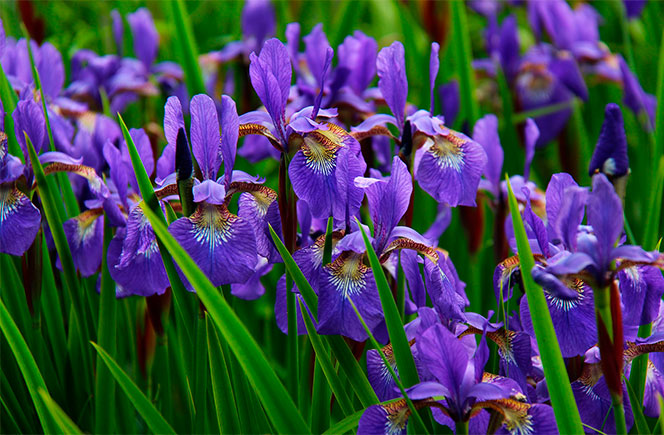

Importamos las librerías necesarias para el material y cargamos los datos crudos en una variable.

In [1]:
# importación de librerías
import pandas as pd #biblioteca para lectura de datos estructurados y su manipulación
import numpy as np  #biblioteca para realizar operaciones con vectores y matrices
import matplotlib.pyplot as plt #biblioteca para visualización de datos
from sklearn import datasets #conjuntos de datos de scikit-learn
#cargamos el conjunto de datos
iris = datasets.load_iris()

Procedemos con una inspección básica de la naturaleza de los datos.

In [2]:
print(iris.feature_names) #observar features
print(iris.target_names) #observar clases
print(iris.data.shape) #dimensiones del set de datos

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


Cargamos la información de los descriptores y las etiquetas del set de datos.

In [3]:
#arreglo de atributos geométricos
x = iris.data

#arreglo de etiquetas reales
y = iris.target

Realizamos una visualización de los datos, mediante el diagrama de dispersión de dos variables.

Text(0, 0.5, 'Sepal Width')

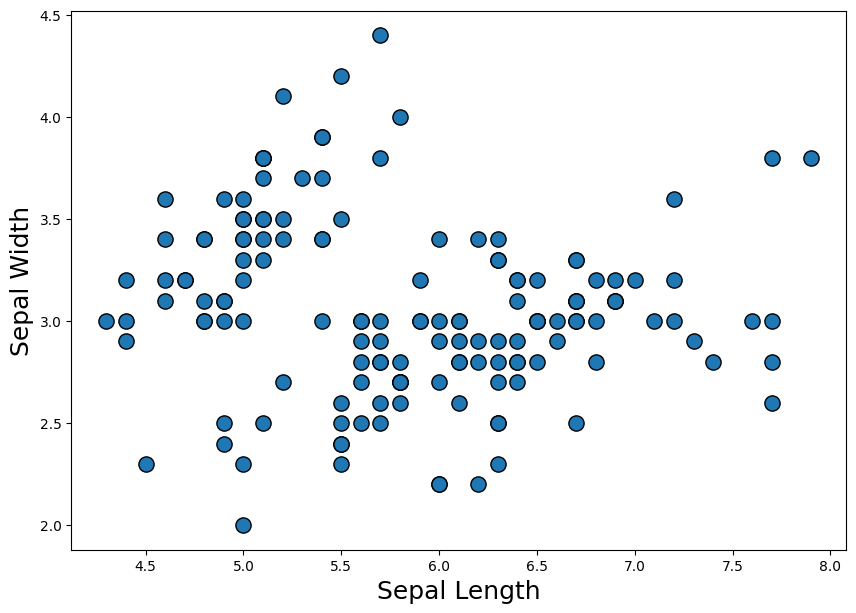

In [4]:
#graficamos el conjunto de datos, sin las etiquetas reales
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1],  edgecolor='k', s=120)
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)

Ahora, desplegamos el gráfico de dispersión con las etiquetas conocidas.

Text(0, 0.5, 'Sepal Width')

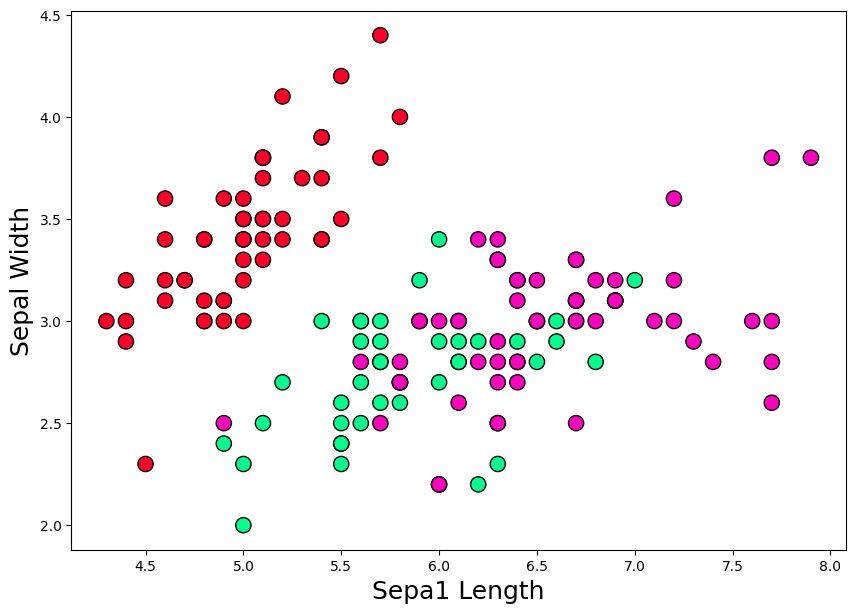

In [5]:
#graficamos el conjunto de datos, con las etiquetas reales
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=y, cmap = 'gist_rainbow', edgecolor='k', s=120)
plt.xlabel('Sepa1 Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)

Ejecutemos el algoritmo PCA al set de datos de iris, para así reducir su dimensionalidad.

In [6]:
from sklearn import decomposition #importamos librería que implementa algoritmos de decomposición

#decomposición PCA
n_components=2 #asociado a las dimensiones de interes
pca = decomposition.PCA(n_components=n_components)
pca.fit(x)
x_pca = pca.transform(x)

Podemos revisar cómo cambiaron las dimensiones de los datos.

In [7]:
print('{}->{}'.format(x.shape, x_pca.shape))

(150, 4)->(150, 2)


Visualicemos los efectos de la reducción de dimensiones por medio de PCA en la distribución de los datos.

Text(0, 0.5, 'Principal Component 1')

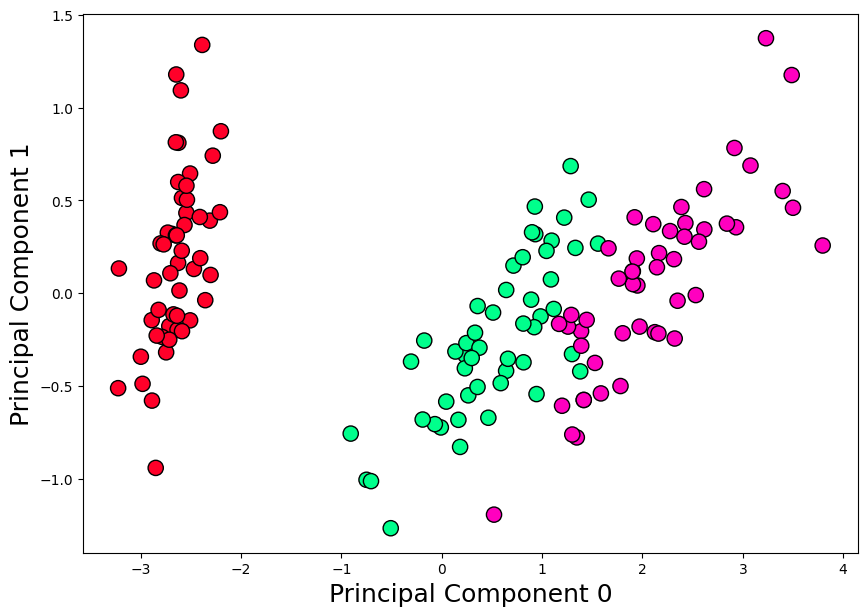

In [8]:
#graficamos el conjunto de datos, con las etiquetas reales
plt.figure(figsize=(10,7))
plt.scatter (x_pca[:, 0], x_pca[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=120)
plt.xlabel ('Principal Component 0', fontsize = 18)
plt.ylabel ('Principal Component 1', fontsize = 18)

Ahora, procederemos con la ejecución del algoritmo de NMF con el set de datos original.

In [9]:
#decomposición NMF
n_components=2 #asociado a las dimensiones de interes
nmf = decomposition.NMF(n_components=n_components, max_iter=300) #mejora de convergencia
nmf.fit(x)
x_nmf = nmf.transform(x)

Revisemos los efectos de la descompisición hecha por NMF en la distribución de los datos.

(150, 4)->(150, 2)


Text(0, 0.5, 'NMF Component 1')

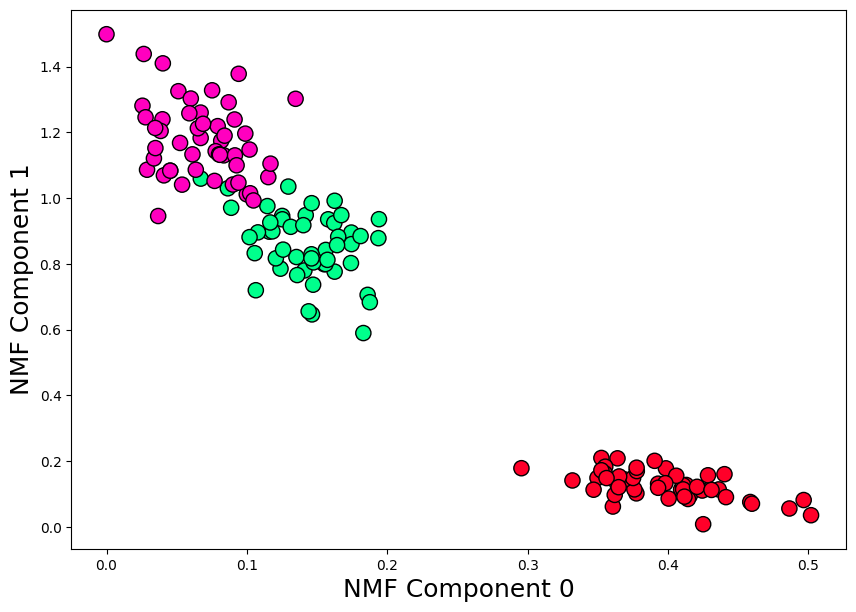

In [10]:
print('{}->{}'.format(x.shape, x_nmf.shape))
#graficamos el conjunto de datos, con las etiquetas reales
plt.figure(figsize=(10,7))
plt.scatter (x_nmf[:, 0], x_nmf[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=120)
plt.xlabel ('NMF Component 0', fontsize = 18)
plt.ylabel ('NMF Component 1', fontsize = 18)

## Análisis de grupos o clústers

Los grupos resultantes al aplicar un algortimo de clustering a un set de datos sin etiquetas corresponden idealmente al número de clases reales.
En la siguiente figura, se ilustra un proceso de clusterización.

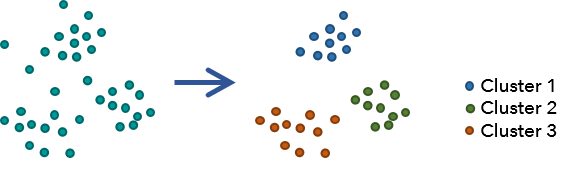

**Propiedades de los clusteres:**

*   Los datos dentro de un clúster deben ser similares entre sí.
*   Los grupos o clústers deben ser lo más diferentes posible entre sí

Se pueden crear clusters muy buenos a partir de la reducción de la distancia entre los objetos en el mismo clúster, conocido como ***minimización intraclúster***  y aumentando la distancia de un clúster a otro, conocido como ***maximización interclúster***.

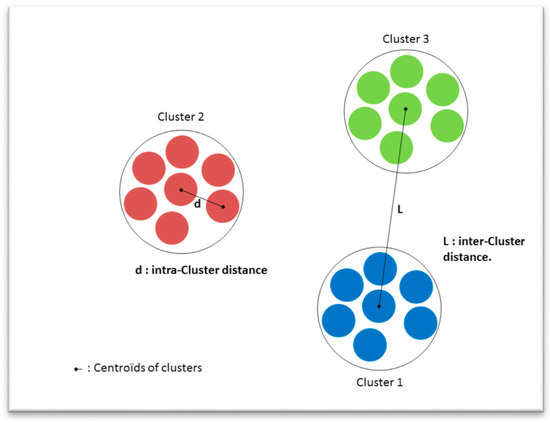

Existen varios tipos de algoritmos de agrupamiento, algunos de ellos son los jerárquicos, los basados en grafos, los basados en redes neuronales, los basados en minimización de error, entre otros. En esta lección, nos centraremos en un algoritmo de agrupamiento jerárquico y el algoritmo k-means basado en la minimización de error.

### Agrupamiento aglomerativo

El clustering aglomerativo o jerárquico construye grupos anidados mediante la unión o separación sucesiva de los mismos. Se fundamenta en el principio de asumir que cada punto es un grupo, posteriormente los más próximos se unen para formar un nuevo grupo hasta que algún criterio de parada se cumple (e.j, cantidad de grupos). Es recomendable emplearlo solamente con set de datos que manejen **dos atributos** (2D).

Es posible tener una idea del número de grupos óptimo usando agrupamiento jerárquico gracias a los **dendogramas**, los cuales ilustran la jerarquización de los clústers como un árbol, donde su raíz es el único clúster que contiene todas las muestras, las hojas son los clústers con una sola muestra.

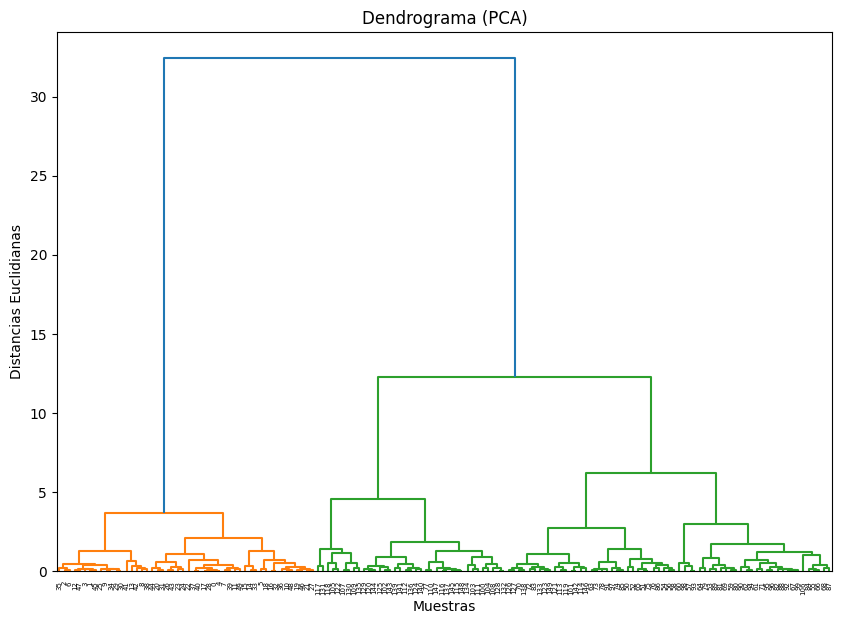

In [11]:
# Creamos el dendograma del conjunto de datos reducido (2D), para encontrar el número óptimo de clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(x_pca, method='ward'))
plt.title('Dendrograma (PCA)')
plt.xlabel('Muestras')
plt.ylabel('Distancias Euclidianas')
plt.show()

Se crea un árbol a partir de todas las muestras o puntos y donde se obtenga la máxima distancia, se marca la zona de grupos recomendados. A continuación, se obtiene el dendograma para la distribución de datos luego aplicar NMF.

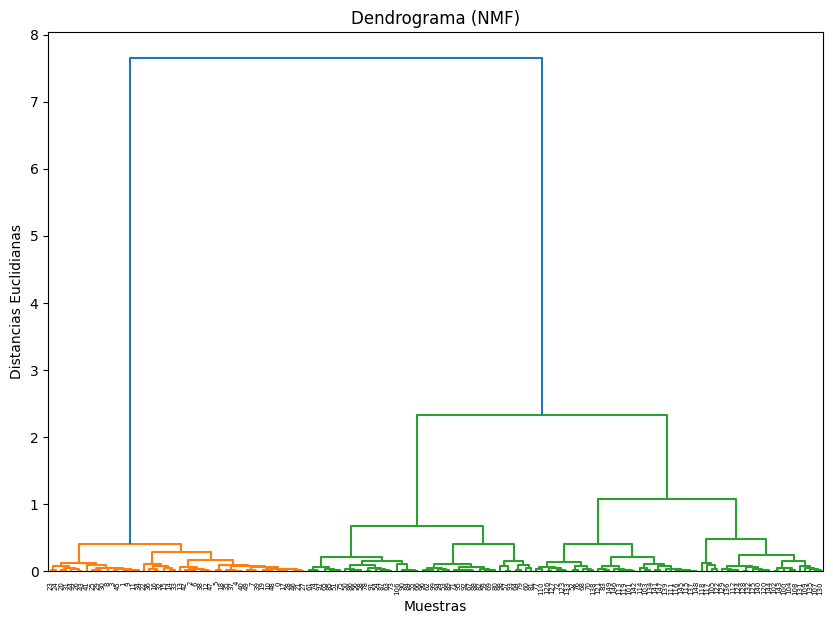

In [12]:
# Creamos el dendograma del conjunto de datos reducido (2D), para encontrar el número óptimo de clusters
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(x_nmf, method='ward'))
plt.title('Dendrograma (NMF)')
plt.xlabel('Muestras')
plt.ylabel('Distancias Euclidianas')
plt.show()

Obsérvese que hay dos grupos claramente definidos en color naranja y verde. No obstante, es posible evidenciar que dentro del clúster verde otros dos grupos bien establecidos, que están relacionadas con las especies *versicolor* y *virginica*, donde sus clústers mantiene estrechas similitudes.

El objeto de aglomeración que implementa la librería de `scikit-learn` realiza un clustering jerárquico utilizando un acercamiento de abajo hacia arriba: cada observación inicia en su propio cluster y los grupos sucesivos son unidos entre sí, basándose en una **métrica** de similitud que generalmente está asociada con la distancia Euclidiana entre los *datapoints*.

In [13]:
# Ajustando Clustering Jerárquico al conjunto de datos PCA
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             metric='euclidean',
                             linkage='ward')
y_ac = ac.fit_predict(x_pca)

El criterio de linaje (*linkage*) determina cuál distancia se usa entre conjuntos de observaciones. En este caso, el método de linaje de Ward establece que la distancia entre dos grupos está definida por el incremento de la suma de cuadrados luego de combinar los clústers. Revisemos visualmente los resultados de la predición utilizando análisis jerárquico de clústers con el set de datos reducidos.

Text(0.5, 1.0, 'Clústers Predichos (AC w/PCA)')

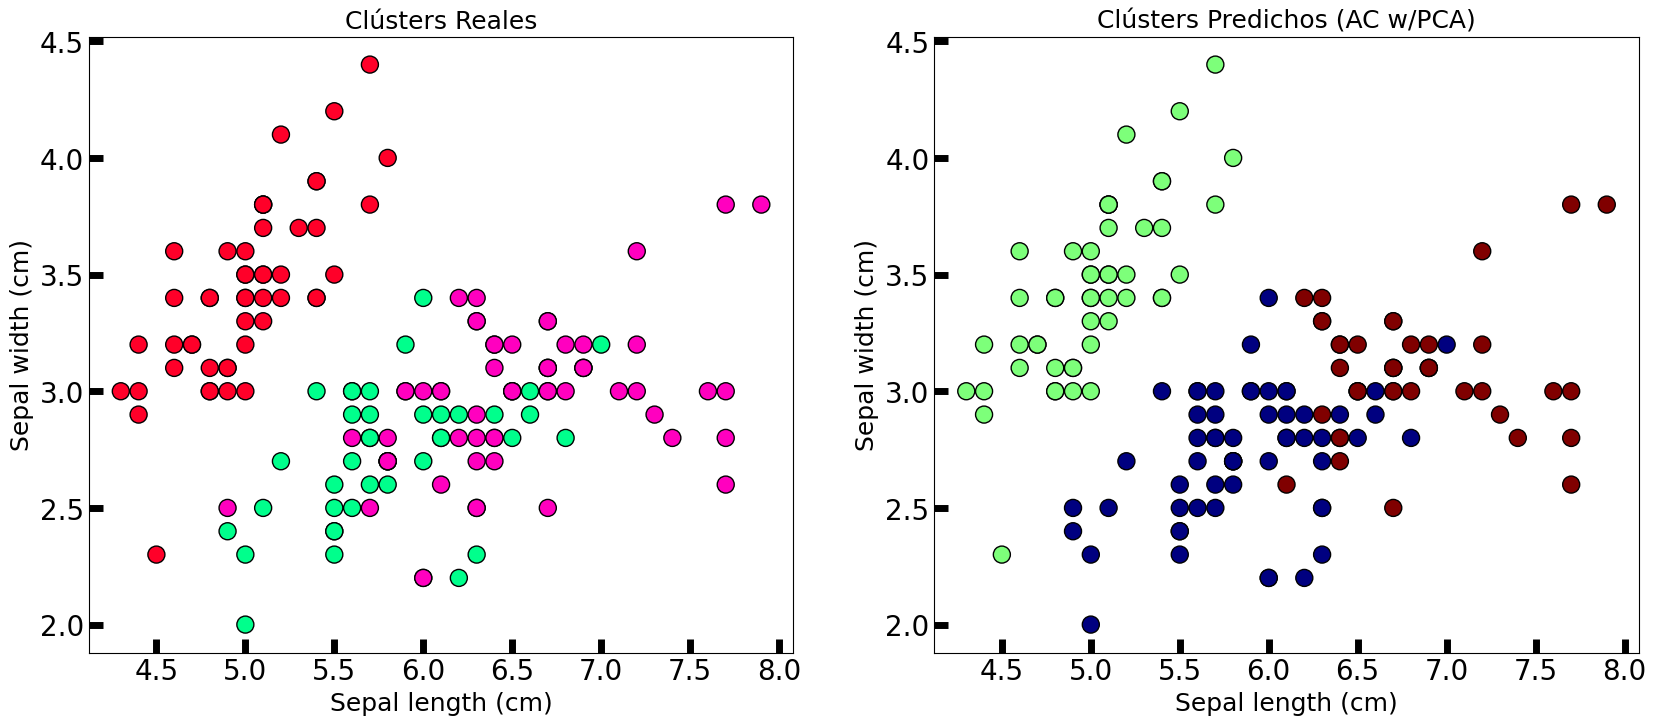

In [14]:
# Comparemos el resultado de la agrupamiento aglormerativo con las etiquetas reales
fig, axes = plt.subplots(1, 2, figsize=(20,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=y_ac, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length (cm)', fontsize=18)
axes[0].set_ylabel('Sepal width (cm)', fontsize=18)
axes[1].set_xlabel('Sepal length (cm)', fontsize=18)
axes[1].set_ylabel('Sepal width (cm)', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clústers Reales', fontsize=18)
axes[1].set_title('Clústers Predichos (AC w/PCA)', fontsize=18)

In [15]:
# Ajustando Clustering Jerárquico al conjunto de datos NMF
ac = AgglomerativeClustering(n_clusters=3,
                             metric='euclidean',
                             linkage='ward')
y_ac = ac.fit_predict(x_nmf)

Text(0.5, 1.0, 'Clústers Predichos (AC w/NMF)')

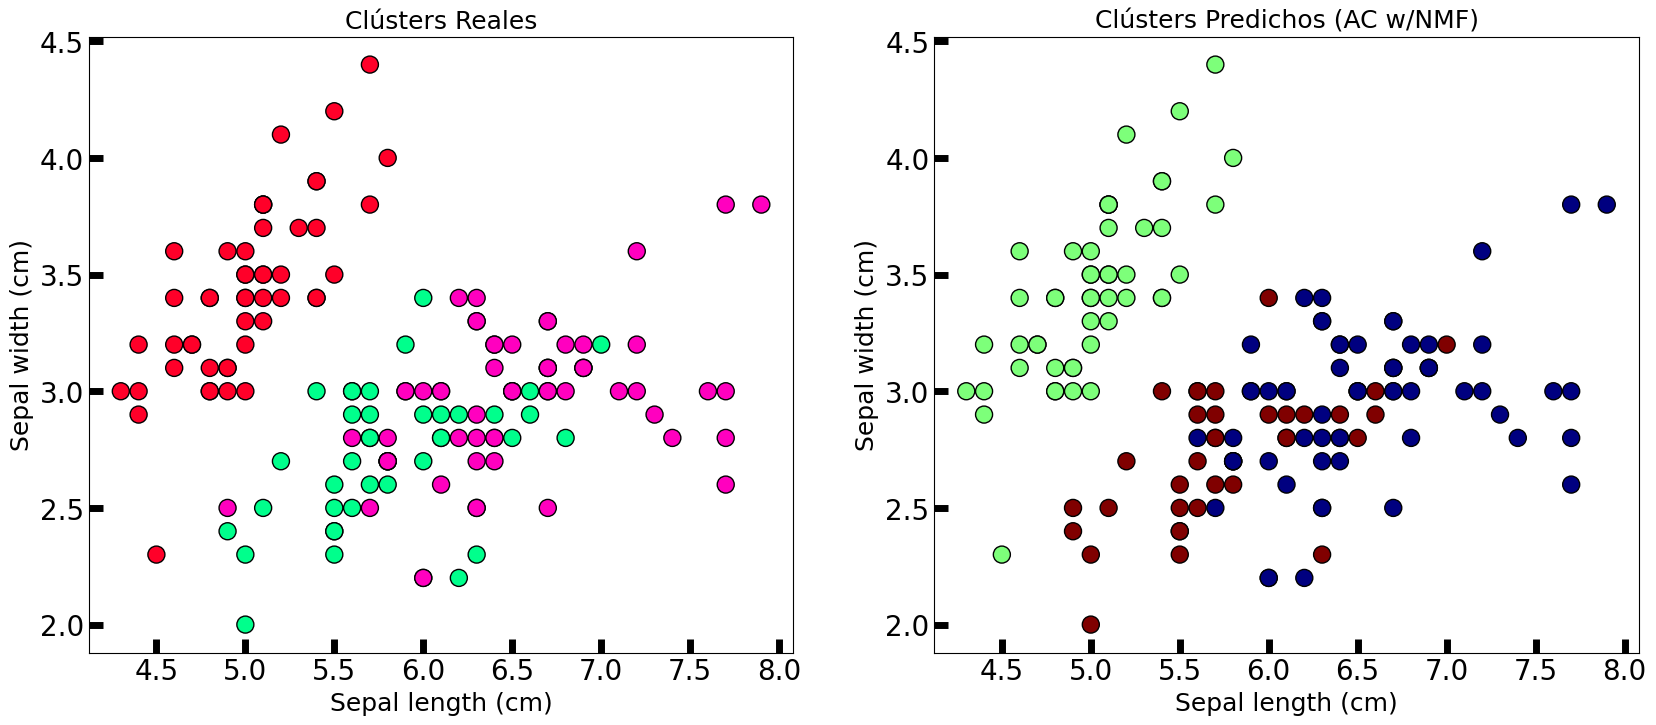

In [16]:
# Comparemos el resultado de la agrupamiento aglormerativo con las etiquetas reales
fig, axes = plt.subplots(1, 2, figsize=(20,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=y_ac, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length (cm)', fontsize=18)
axes[0].set_ylabel('Sepal width (cm)', fontsize=18)
axes[1].set_xlabel('Sepal length (cm)', fontsize=18)
axes[1].set_ylabel('Sepal width (cm)', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clústers Reales', fontsize=18)
axes[1].set_title('Clústers Predichos (AC w/NMF)', fontsize=18)

### Algoritmo de k-medias

El algoritmo k-medias o *k-means* agrupa los datos al tratar de separar las muestras en **N** grupos de igual varianza, minimizando la suma de la distancia intraclusteres partiendo desde el centroide.

Este algoritmo requiere que se especifique el número de clústeres dentro de sus parámetros. Este parámetro se refiere a el número de grupos para encontrar.

La siguiente figura muestra el funcionamiento del algoritmo k-medias.
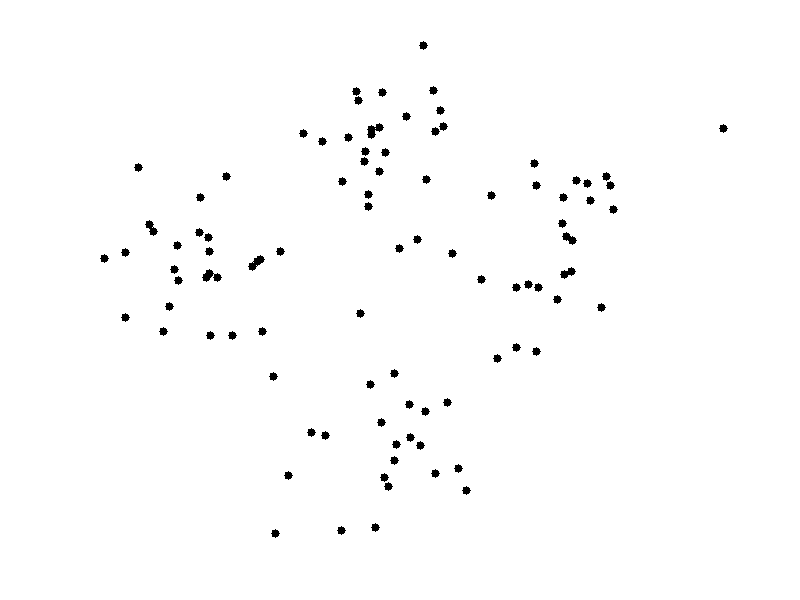

Básicamente, luego de inicializar los centroides de forma aleatoria, se repiten dos pasos iterativamente:

1. Asignar cada observación al centroide más cercano.
2. Se recalcula el valor de cada centroide a partir de la media de las observaciones asignadas.

El algoritmo se detiene cuando terminan los cambios en las asignaciones de las observaciones (convergencia del algoritmo) o cuando se ejecuta una cantidad máxima de iteraciones definidas.

Procederemos a cargar el objeto de la librería asociada que implementa este algoritmo.

In [17]:
from sklearn.cluster import KMeans #importamos el algoritmo

Ahora, implementaremos este algoritmo para agrupar sin supervisión tres especies de plantas iris según las dimensiones del sépalo.

In [18]:
#pondremos a entrenar el algoritmo K Means con los 3 clústers conocidos,
#100 ejecuciones con distinta semilla para ajustar el centroide de cada clúster
#400 iteraciones maximo del algoritmo en una sola ejecución
km = KMeans(n_clusters=3, n_init=100, max_iter=400).fit(x)

#conozcamos los centroides predecidos
centers = km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Despleguemos los resultados del agrupamiento del algoritmo de k-medias en la distribución de los datos geométricos del sépalo.

Text(0.5, 1.0, 'Clústers Predichos (KM)')

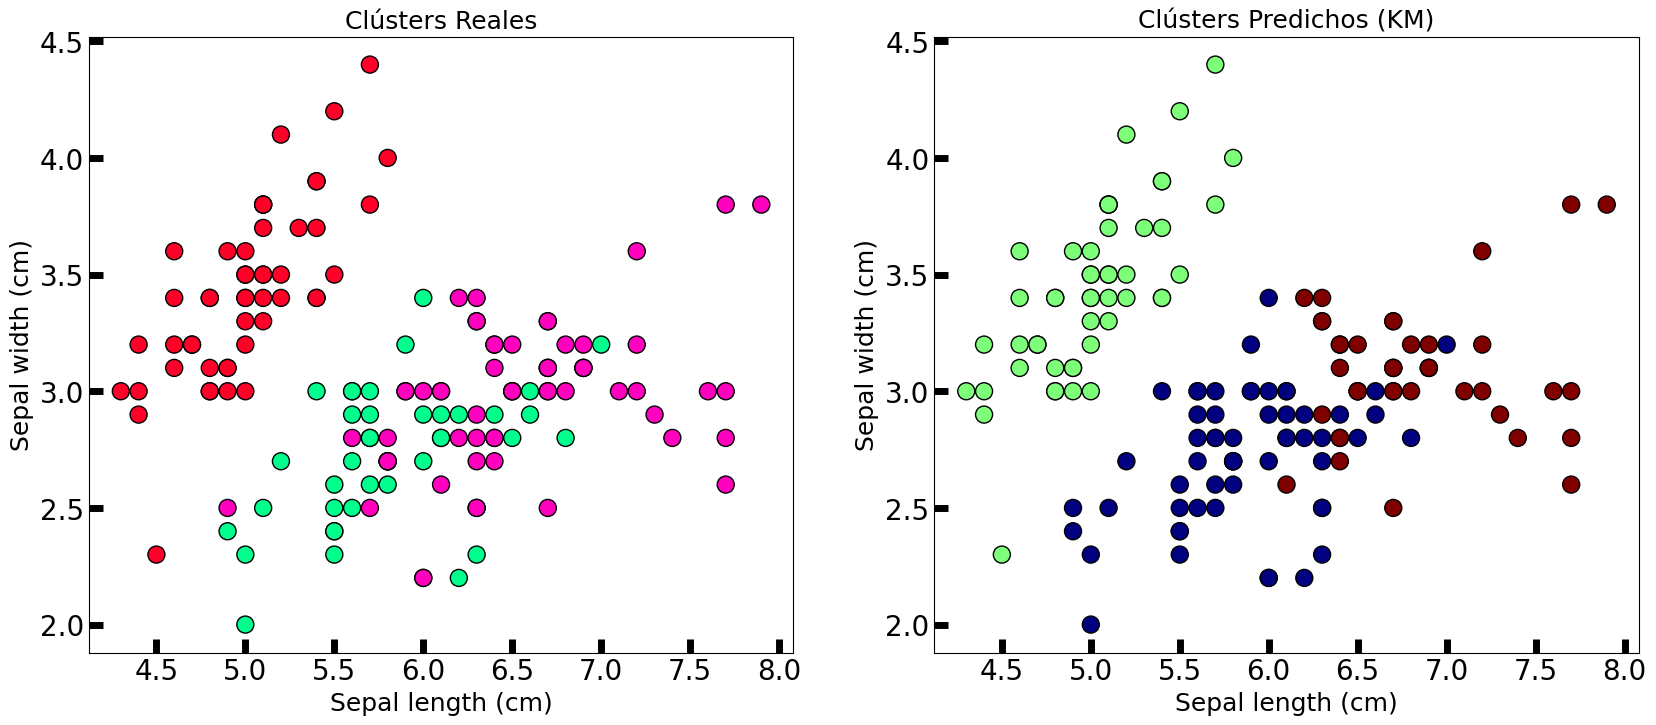

In [19]:
#etiquetas predichas
y_km = km.labels_
# Comparemos el agrupamiento de k-means con las etiquetas reales
fig, axes = plt.subplots(1, 2, figsize=(20,8))
axes[0].scatter(x[:,0], x[:,1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:,0], x[:,1], c=y_km, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length (cm)', fontsize=18)
axes[0].set_ylabel('Sepal width (cm)', fontsize=18)
axes[1].set_xlabel('Sepal length (cm)', fontsize=18)
axes[1].set_ylabel('Sepal width (cm)', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clústers Reales', fontsize=18)
axes[1].set_title('Clústers Predichos (KM)', fontsize=18)

Procederemos a entrenar el algoritmo de k-means ahora con la distribución de datos luego de aplicar PCA.

In [20]:
#pondremos a entrenar el algoritmo K Means con los 3 clústers conocidos,
#100 ejecuciones con distinta semilla para ajustar el centroide de cada clúster
#400 iteraciones maximo del algoritmo en una sola ejecución

#ajuste de kmeans a la distribucion PCA
km_pca = KMeans(n_clusters=3, n_init=100, max_iter=400).fit(x_pca)
#conozcamos los centroides predecidos
centers = km_pca.cluster_centers_
print(centers)

[[ 2.34652659  0.27393856]
 [-2.64241546  0.19088505]
 [ 0.66567601 -0.3316042 ]]


Grafiquemos las estimaciones hechas por el algoritmo de k-medias con la reducción de PCA.

Text(0.5, 1.0, 'Clústers Predichos (KM w/ PCA)')

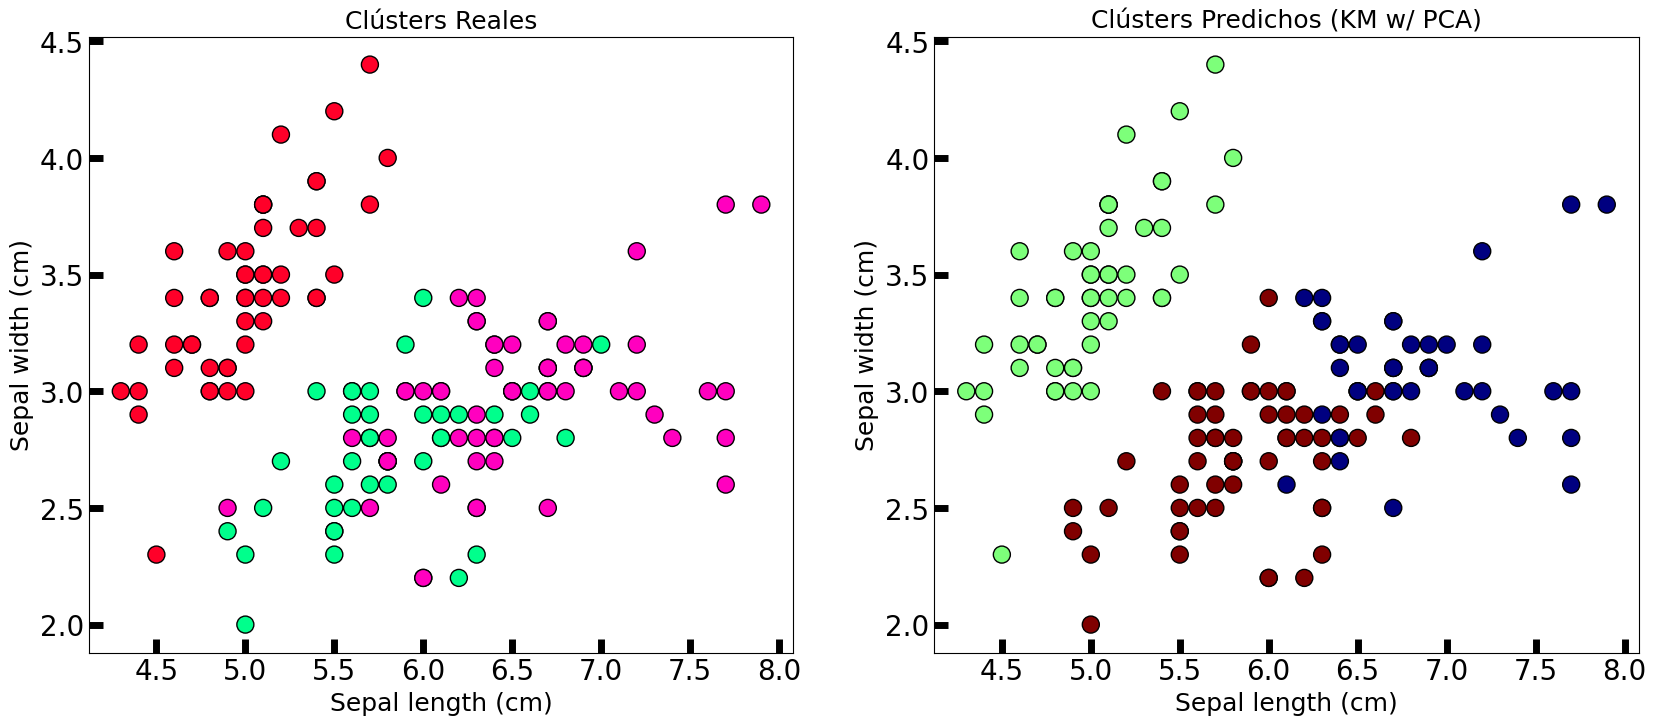

In [21]:
#etiquetas predichas
y_km = km_pca.labels_
# Comparemos el agrupamiento de k-means con las etiquetas reales
fig, axes = plt.subplots(1, 2, figsize=(20,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=y_km, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length (cm)', fontsize=18)
axes[0].set_ylabel('Sepal width (cm)', fontsize=18)
axes[1].set_xlabel('Sepal length (cm)', fontsize=18)
axes[1].set_ylabel('Sepal width (cm)', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clústers Reales', fontsize=18)
axes[1].set_title('Clústers Predichos (KM w/ PCA)', fontsize=18)

Ejecutemos la rutina anterior, pero con el set de datos reducido con NMF.

In [22]:
#ajuste de kmeans a la distribucion NMF
km_nmf = KMeans(n_clusters=3, n_init=100, max_iter=400).fit(x_nmf)
#conozcamos los centroides predecidos
centers = km_nmf.cluster_centers_
print(centers)

[[0.39650019 0.12612008]
 [0.14126619 0.85723664]
 [0.06822002 1.18346208]]


Comparemos los resultados del algoritmo de k-medias con NMF con las etiquetas reales del set de datos.

Text(0.5, 1.0, 'Clústers Predichos (KM w/ NMF)')

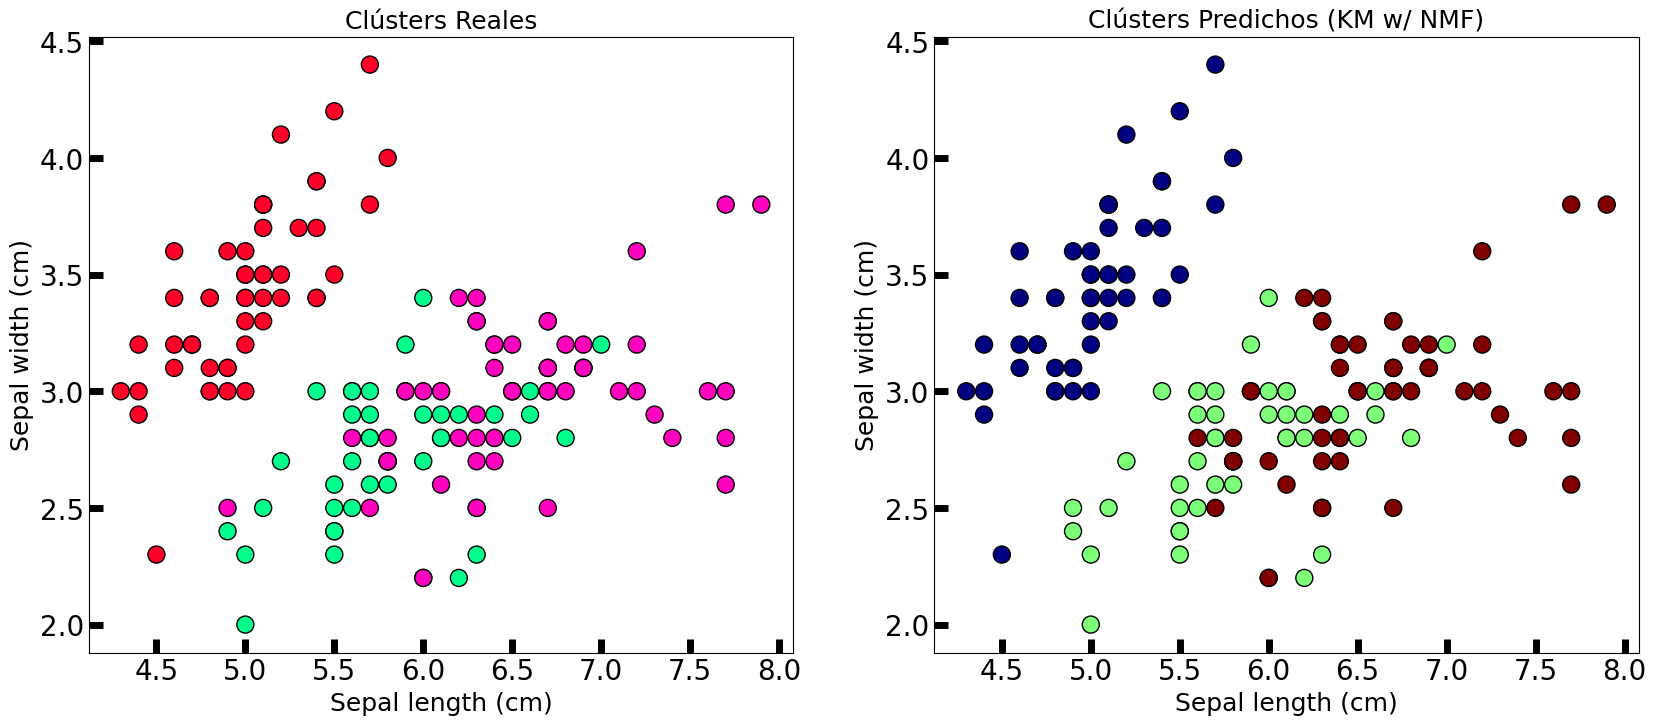

In [23]:
#etiquetas predichas
y_km = km_nmf.labels_
# Comparemos el agrupamiento de k-means con las etiquetas reales
fig, axes = plt.subplots(1, 2, figsize=(20,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=y_km, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length (cm)', fontsize=18)
axes[0].set_ylabel('Sepal width (cm)', fontsize=18)
axes[1].set_xlabel('Sepal length (cm)', fontsize=18)
axes[1].set_ylabel('Sepal width (cm)', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clústers Reales', fontsize=18)
axes[1].set_title('Clústers Predichos (KM w/ NMF)', fontsize=18)

Haciendo la observación de las prediciones hechas por ambos modelos, notamos una mejor predicción empleando la reducción NMF.

#### Ventajas y desventajas de k-medias

* Ventajas:


> 1. Su uso es tan sencillo como llamar una función.
2. Computacionalmente es rápido y no tan costoso como otros algoritmos.
3. Visualizar sus resultados es fácil.
4. Provee medida de la distancia intra-clúster.
5. Es muy intuitivo


* Desventajas:


> 1. Evaluar los resultados de k-means requiere más de intuición y análisis humano que el uso de métricas.
2. No provee métricas de evaluación adicionales.
3. No es  recomendado cuando son muchos clústers.
4. No es adecuado para datos de diferentes formas y densidades.
5. Requiere saber *a priori* la cantidad de clústers

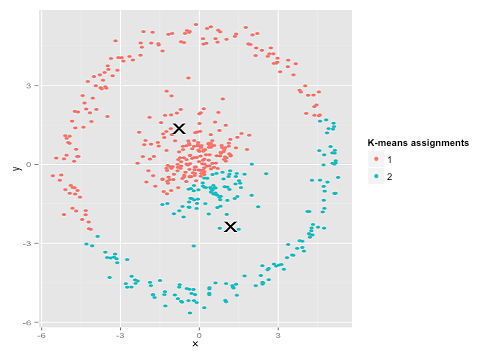

## Desempeño de un algoritmo de aprendizaje no supervisado


La evaluación del rendimiento de un algoritmo de agrupamiento no es tan sencillo como cuantificar los errores o la precisión de sus estimaciones. Cualquier métrica de clusterización no debería tomar en cuenta los valores absolutos de las etiquetas predichas, más bien si este agrupamiento establece separaciones de datos similares o si estos pertenecen a una misma clase de acuerdo a una métrica de similitud.

En caso de contar con las etiquetas reales de los datos, podemos emplear ciertas métricas como el **índice de Rand** (*Rand score*) no ajustado y ajustado. Por su parte, cuando desconocemos por completo las etiquetas reales, se puede hacer uso del **índice Dunn**, **coeficiente de siluetas**, así como la **medición de la inercia** para el caso de k-medias. A continuación, veremos en qué consisten estas métricas que nos ayudan a conocer la calidad de nuestras agrupaciones.

### Inercia

Esta métrica que implementa el modelo de k-medias indica qué tan lejos están los puntos u observaciones dentro de cada grupo. Calcula la suma del cuadrado de la distancia de todos los puntos dentro de un grupo respecto al centro de ese grupo; es decir, suma las distancias intraclústeres. Podemos decir que entre menor sea este valor, mejores son los clústers obtenidos. La inercia se calcula haciendo uso de la siguiente fórmula:
\begin{equation}
\sum_{i=0}^{n}\underset{\mu_{j}\in C}{min}\left ( \parallel  x_{i} - \mu _{j} \parallel^{2} \right )
\end{equation}

  donde:
  * $n$: total de observaciones del set de datos.
  * $x_i$: i-ésima observación.
  * $\mu_j$: centroide del clúster más cercano a la observación $x_i$.
  * $C$: conjunto de centroides de los clústers encontrados.

In [24]:
# Modelo de k-medias con el dataset original
print('Inercia de k-medias entrenado sin PCA: {}'.format(km.inertia_))
# Modelo de k-medias con el dataset modificado con PCA
print('Inercia de k-medias entrenado con PCA: {}'.format(km_pca.inertia_))
# Modelo de k-medias con el dataset modificado con NMF
print('Inercia de k-medias entrenado con NMF: {}'.format(km_nmf.inertia_))

Inercia de k-medias entrenado sin PCA: 78.85144142614601
Inercia de k-medias entrenado con PCA: 63.8199420220012
Inercia de k-medias entrenado con NMF: 1.3695538018981555


Cuando trabajamos problemas que requieren el uso de algoritmos de agrupamiento, hay que tener en cuenta que muchos necesitan conocer *a priori* la cantidad de clústers con los que se debe clasificar los datos.

A continuación, veremos la técnica llamada "*elbow*" para definir cuál es el número óptimo de clústers.

#### Técnica para estimar la cantidad de clústers

Se define la curva del número de cluster en relación con la distancia intraclúster y se establece el punto de codo (*elbow point*), el cual podría ser el número óptimo de clusters según un experimento.
Se hacen pruebas con los valores que se acerquen más a la curva, realizando el análisis según los valores de **inercia** obtenidos para cada cantidad de clústers.

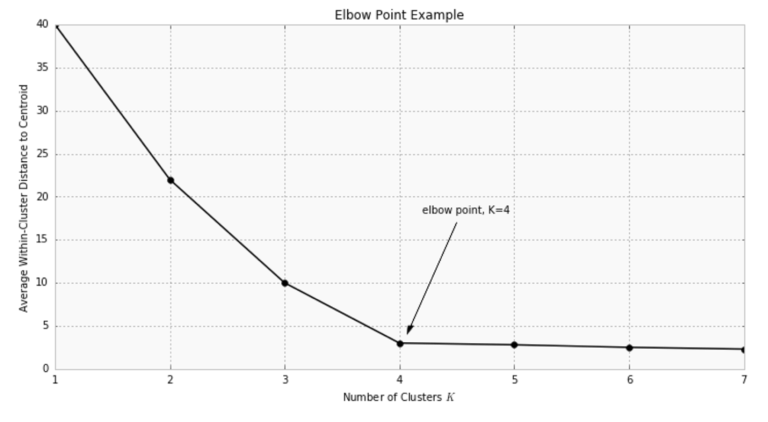

In [25]:
#importación de bibliotecas
import matplotlib.pyplot as plt #importamos la biblioteca para graficar
import pandas as pd #importamos la biblioteca para preprocesar los datos
import numpy as np #importamos numpy para manejo de arrays
from sklearn import datasets #importamos los datasets
from sklearn.cluster import KMeans #importamos el algoritmo

Text(0, 0.5, 'Sepal Width')

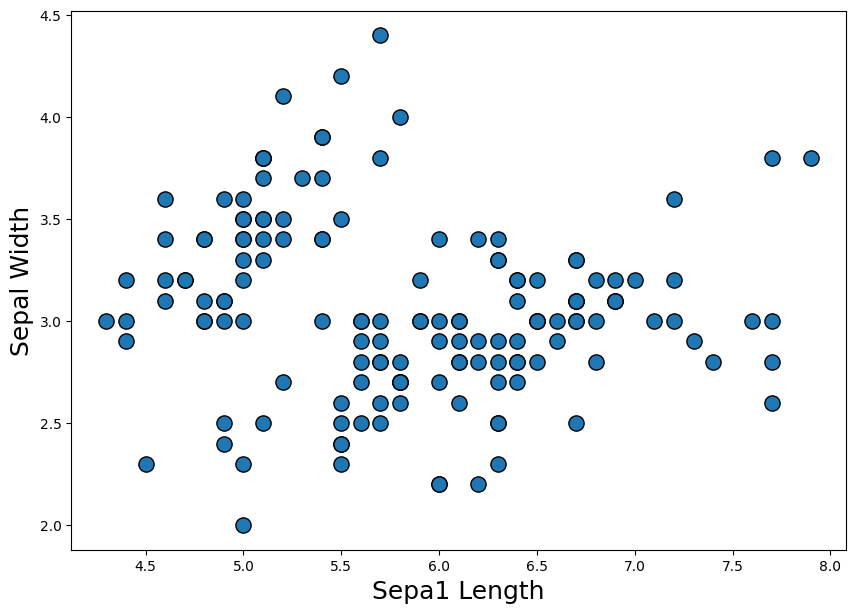

In [27]:
#graficamos el conjunto de datos
plt.figure(figsize=(10,7))
plt.scatter (x[:,0], x[:,1], edgecolor='k', s=120)
plt.xlabel('Sepa1 Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)

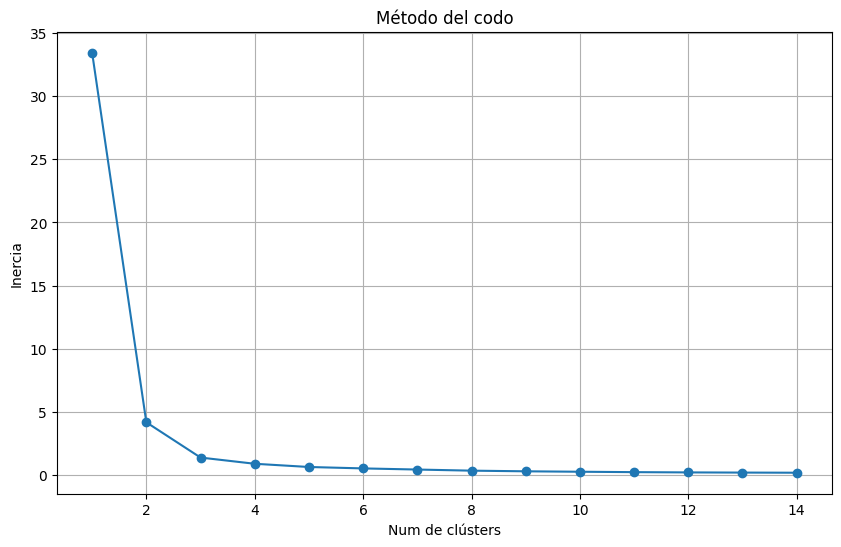

In [26]:
#entrenamiento de KMeans empleando diferentes numeros de clusters
#100 ejecuciones con distinta semilla para ajustar el centroide de cada clúster
#400 iteraciones maximo del algoritmo en una sola ejecución
inercia = []

#Calcular la inercia usando entre 1 y 15 clusters
for i in range(1,15):
  #km = KMeans(n_clusters=i, n_init=100, max_iter=400).fit(x)
  #km = KMeans(n_clusters=i, n_init=100, max_iter=400).fit(x_pca)
  km = KMeans(n_clusters=i, n_init=100, max_iter=400).fit(x_nmf) # mejor puntaje y estimaciones

  #para cada cluster se calcula la suma del cuadrado dentro del clúster
  inercia.append(km.inertia_)


#trazamos la curva o el codo, de la suma de los errores cuadráticos
plt.figure(figsize=[10,6])
plt.title("Método del codo")
plt.xlabel("Num de clústers")
plt.ylabel("Inercia")
plt.plot(list(range(1,15)), inercia, marker="o")
plt.grid()
plt.show()

In [28]:
#determinamos que el número de clústers es 3 y ejecutamos nuestro algoritmo
cantidad_cluster = 3

#parámetros: numero de clusters, numero de veces que el algoritmo se ejecutará con diferentes centroides, numero maximo de iteraciones
clf = KMeans(n_clusters = cantidad_cluster, n_init=100, max_iter=400).fit(x_nmf)

#obtenemos la ubicacion de los centroides y las etiquetas predichas
centroides, etiquetas, inercia = clf.cluster_centers_, clf.labels_, clf.inertia_

#predecimos a partir de lo aprendido por el algoritmo
result = clf.predict(x_nmf)
print(result)
print("inercia", inercia)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
inercia 1.3695538018981557


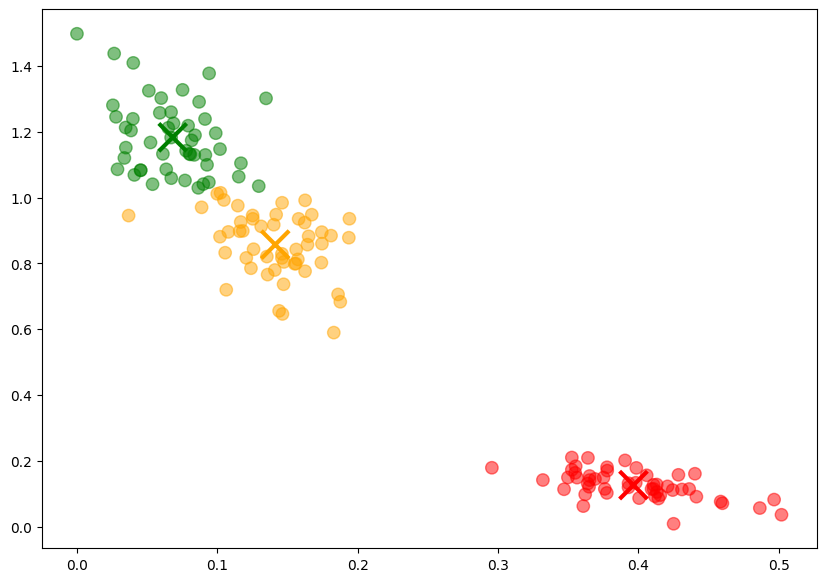

In [29]:
#graficamos los centroides

#colores de cada cluster
colores = ["red", "green", "orange"]
colores_cluster = [colores[etiquetas[i]] for i in range(len(x_nmf))]
plt.figure(figsize=(10,7))
plt.scatter(x_nmf[:,0], x_nmf[:,1], c=colores_cluster, marker="o", alpha=0.5, s=80)

#se grafican los centroides
plt.scatter(centroides[:,0], centroides[:,1], marker="x", s=400, linewidths=3, c=colores)

plt.show()

### Índice de Rand

El índice Rand (ajustado o no-ajustado) calcula una medida de similitud entre dos agrupamientos de los datos: el verdadero y el realizado por el algoritmo. Al considerar todos los pares de observaciones y contar cuántos pares se asignan en el mismo grupo o en grupos diferentes, tanto en los grupos predichos por el algoritmo como en los verdaderos. Revisemos ahora el índice Rand sin ajustar para el modelo de agrupamiento aglomerativo después de comparar las etiquetas reales con las predichas.

In [30]:
from sklearn.metrics import rand_score

shape = y_ac.shape   #obtener la forma de los resultados
y_truth = np.reshape(y, shape)  #transformar las etiquetas reales para poder compararlas con las predichas

#comparemos
print(y_truth[0:150]) #etiquetas reales
print(y_ac[0:150]) #etiquetas predichas por AC (2D)

#evaluación según rand score
print('Índice de Rand no-ajustado:', rand_score(y, y_ac))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Índice de Rand no-ajustado: 0.9341387024608501


Se devuelve una puntuación de similitud entre -1,0 y 1,0. Los etiquetados aleatorios que tienen un valor cercano a 0.0. y 1.0 representan una combinación perfecta. Los valores negativos para este índice indican que la similitud entre los agrupamientos es menor que la esperada para agrupamientos totalmente aleatorios.

El índice Rand no asegura obtener un valor cercano a 0.0 para un etiquetado aleatorio. El índice Rand ajustado implementa dicha corrección.


In [31]:
from sklearn.metrics import adjusted_rand_score
#evaluación según adjusted rand score
print('Índice de Rand ajustado:', adjusted_rand_score(y, y_ac))

Índice de Rand ajustado: 0.8511690525435782


 Es importante recalcar que ambas métricas requieren las etiquetas reales para poder evaluar el modelo apropiadamente. En este caso, realizamos el cálculo para el modelo de k-medias utilizando la distribución de datos original, sin aplicar reducción de dimensionalidades.

In [32]:
y_km = km.labels_
shape = y_km.shape   #obtener la forma de los resultados
y_truth = np.reshape(y, shape)  #transformar las etiquetas reales para poder compararlas con las predichas

#comparemos
print(y_truth[0:150]) #etiquetas reales
print(y_km[0:150]) #etiquetas predichas por KM

print('Índice de Rand no-ajustado:', rand_score(y, y_km))
print('Índice de Rand ajustado:', adjusted_rand_score(y, y_km))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[13  1  1  1 13 13  1  1  1  1 13  1  1  1 10 10 10 13 13 13  7 13 10  7
  7  7  7 13 13  7  7 13 10 10  1 13 13 13  1 13 13  7  1  7  7  1 13  1
 13 13  2  2  6  5 12 12 12  4  2  5  4  5  5 12  4  2 12  5  6  5  6  5
  6 12  2  2  6  6 12  4  5  5  5  0 12  2  2 12  5  5 12 12  5  4  5  5
  5  2  4  5  3  0  8 11  8  9 12  3  8  3  6 11 11  0  0 11 11  3  9  0
  8  0  9  6  8  8  6  6  8  8  3  3  8  6 11  3  8 11  6 11  8 11  0  8
  8 11  0 11 11  0]
Índice de Rand no-ajustado: 0.738165548098434
Índice de Rand ajustado: 0.26279033589004774


Finalmente, calculamos el índice de Rand en ambas versiones para el modelo de k-medias entrenado con la distribución de los datos luego de aplicar PCA y NMF.

In [33]:
y_km = km_pca.labels_
shape = y_km.shape   #obtener la forma de los resultados
y_truth = np.reshape(y, shape)  #transformar las etiquetas reales para poder compararlas con las predichas

#comparemos
print(y_truth[0:150]) #etiquetas reales
print(y_km[0:150]) #etiquetas predichas por KM con PCA

print('Índice de Rand no-ajustado:', rand_score(y, y_km))
print('Índice de Rand ajustado:', adjusted_rand_score(y, y_km))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Índice de Rand no-ajustado: 0.8737360178970918
Índice de Rand ajustado: 0.7163421126838476


In [34]:
y_km = km_nmf.labels_
shape = y_km.shape   #obtener la forma de los resultados
y_truth = np.reshape(y, shape)  #transformar las etiquetas reales para poder compararlas con las predichas

#comparemos
print(y_truth[0:150]) #etiquetas reales
print(y_km[0:150]) #etiquetas predichas por KM con NMF

print('Índice de Rand no-ajustado:', rand_score(y, y_km))
print('Índice de Rand ajustado:', adjusted_rand_score(y, y_km))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
Índice de Rand no-ajustado: 0.941744966442953
Índice de Rand ajustado: 0.8680377279943841


### Índice de Dunn

La medición del índice de Dunn toma en cuenta la distancia de los grupos entre sí, respecto a qué tan lejos están las observaciones internas de los grupos, unas de las otras. Esta distancia se conoce como distancia interclústeres. Entre más grande sea el valor del índice Dunn, mejor serán los grupos. Está definido por la siguiente fórmula:

\begin{equation}
D=\frac{\underset{1\leq i,j\leq k,\: i\neq j}\min{dist(C_i,C_j)}}{\underset{1\leq h\leq k}\max{diam(C_h)}}
\end{equation}

  donde:
  * el numerador es la distancia mínima entre dos observaciones pertenecientes a clústers diferentes ($C_i,C_j$).
  * el denominador es la distancia máxima entre dos observaciones pertenecientes a un mismo clúster ($C_h$), también conocida como diámetro del clúster.

### Coeficiente de silueta

El coeficiente de silueta ($c$) es obtenido gracias al uso del valor medio de la distancia media intra-cluster ($a$) y la distancia media del clúster más cercano ($b$) para cada muestra, mediante la siguiente ecuación:

\begin{equation}
c=\frac{b-a}{\max(a, b)}
\end{equation}

Para aclarar acá, el valor de $b$ es la distancia entre una muestra y el clúster más cercano al que esa muestra no pertence.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x, y_ac)

El mejor valor posible es 1.0 y el peor, -1.0. Valores cercanos a 0.0 indican grupos solapados. Los valores negativos generalmente sugieren que una muestra fue asignada al clúster incorrecto.

In [ ]:
#y_km = km.labels_
#y_km = km_pca.labels_
y_km = km_nmf.labels_
silhouette_score(x, y_km)

**QUIZ MEDICIÓN DESEMPEÑO CLUSTERING**

Imagine que deseamos hacer una segmentación del mercado para una tienda de comercio electrónico, con base en características de los clientes. Una métrica adecuada para medir el desempeño del algoritmo de clustering sería:
- Matriz de confusión
- Índice de Rand
- $R^2$
- Ninguna de las anteriores

## Aplicaciones de clustering en la industria

* Segmentación de mercado
* Analísis de redes sociales
* Agrupación de resultados de búsqueda
* Imágenes Médicas
* Segmentación de Imágenes
* Detección de anomalías




## Modelos adicionales de aprendizaje no supervisado

*    Refiérase al capítulo de clustering del sitio de scikit-learn, para más modelos y técnicas de reducción de dimensionalidades y agrupamiento: https://scikit-learn.org/stable/modules/clustering.html

## Práctica 3

Usando el dataset *obesity.csv* y guiándose con la descripción de sus variables en el archivo *obesity_description.txt*:

1. Obtenga un modelo de k-means que agrupe observaciones según atributos relacionados con **altura**, **peso** y **hábitos alimenticios** en 7 categorías de sobrepeso (*NObeysedad*).
2. Grafique los resultados de clusterización según **altura** y **peso** y obtenga el puntaje de evaluación de las estimaciones hechas por k-medias.
3. Aplique las técnicas de reducción de dimensionalidad vistas en la lección al set de datos en análisis para que este sea ahora de dos dimensiones. Genere la visualización correspondiente.
4. Ahora, entrene el modelo de agrupamiento aglomerativo con el set de datos de dos dimensiones. Grafique los resultados según altura y peso de las estimaciones y obtenga su evaluación. Compare estos resultados con los del inciso 2.

In [ ]:
# Puede realizar su práctica aquí